#Gradient Descent with Simple Linear Regression


-  **Step 1**:  Calculate the coefficients for a simple linear regression model. Normalize the dataset.

-  **Step 2**:  Write a function that implements gradient descent to generate the linear regression equation coefficients by minimizing the Sum of Squared Errors (SSE) cost function.

- **Step 3**:  Plot the two equations from Steps 1 and 2 as well as the raw data points on the same graph.

- **Step 4**:  Iterate a different amount of times to observe the impact on the cost function. Note the minimum number of iterations it takes for the two lines to coincide.

- **Step 5**:  Plot the coefficients (b0 and b1) on the x and y axes, respectively, and the SSE (Sum of Square Errors) on the z-axis.

- **Step 6**:  Use the R-squared score metric to calculate the performance for both methods.



In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.metrics import r2_score

# Input Parameters
Age = np.array([43,21,25,42,57,59,35,15,55,50,65,10,45,35])
Glucose = np.array([99,65,79,75,87,81,80,80,90,70,95,67,90,82])

simple linear regression b0 coefficient: 0.1731
simple linear regression b1 coefficient: 0.5725
simple linear regression predicted values: [0.5167 0.2876 0.3293 0.5062 0.6624 0.6832 0.4334 0.2252 0.6416 0.5895
 0.7457 0.1731 0.5375 0.4334]
simple linear regression cost: 0.0529


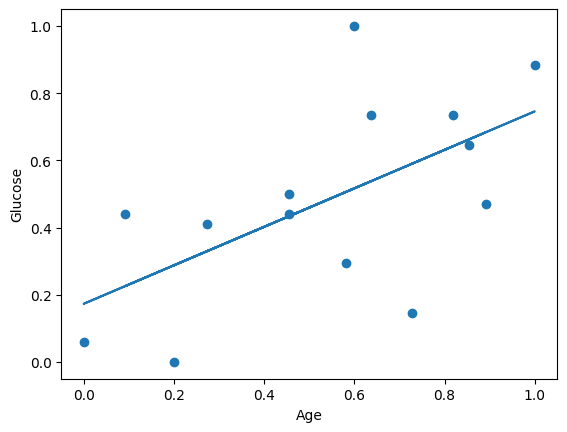

In [ ]:
# Step 1: Calculate the coefficients for a simple linear regression model.
#         Normalize the dataset.

ageNorm = (Age - Age.min()) / (Age.max() - Age.min())
glucoseNorm = (Glucose - Glucose.min()) / (Glucose.max() - Glucose.min())

def simpleLRcoeffsManual(X, Y):
  XMean = X.mean()
  YMean = Y.mean()

  numerator = np.dot((X - XMean), (Y - YMean))
  denominator = np.dot((X - XMean), (X - XMean))

  b1 = numerator / denominator
  b0 = YMean - (b1 * XMean)

  return b0, b1

# Print out coefficients, prediction (yhat or ypred), and the SSE
def prediction(X, coeffs):
  yHat = coeffs[0] + (coeffs[1] * X)
  return yHat

def calcSSE(y, yHat):
  SSE = (1 / np.shape(y)[0]) * (np.dot((y - yHat), (y - yHat)))
  return SSE

coeffsLR = simpleLRcoeffsManual(ageNorm, glucoseNorm)
yHatLR = prediction(ageNorm, coeffsLR)
SSELR = calcSSE(glucoseNorm, yHatLR)
print("simple linear regression b0 coefficient:", round(coeffsLR[0], 4))
print("simple linear regression b1 coefficient:", round(coeffsLR[1], 4))
print("simple linear regression predicted values:", np.round(yHatLR, 4))
print("simple linear regression cost:", round(SSELR, 4))

# Plot the data and prediction line for the manual calculation
plt.scatter(ageNorm, glucoseNorm)
plt.plot(ageNorm, yHatLR)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.show()

In [ ]:
# Step 2: Write a function that implements gradient descent to generate the linear regression
#         equation coefficients by minimizing the Sum of Squared Errors (SSE) cost function.

def gradientDescent(coeffs, X, y, lr, iterations):
  b0, b1 = coeffs[0], coeffs[1]
  n = np.shape(X)[0]
  b0_arr, b1_arr, SSE_arr = np.zeros(iterations), np.zeros(iterations), np.zeros(iterations)
  for i in range(iterations):
    yHat = b0 + (b1 * X)

    SSE = calcSSE(y, yHat)
    SSE_arr[i] = SSE

    b0Grad = (-2 / n) * np.sum((y - yHat))
    b1Grad = (-2 / n) * np.sum((y - yHat) * X)
    b0 = b0 - (lr * b0Grad)
    b0_arr[i] = b0
    b1 = b1 - (lr * b1Grad)
    b1_arr[i] = b1

  return b0_arr, b1_arr, SSE_arr

gradient descent b0 coefficient: 0.2003
gradient descent b1 coefficient: 0.5257
gradient descent predicted values: [0.5158 0.3055 0.3437 0.5062 0.6496 0.6687 0.4393 0.2481 0.6305 0.5827
 0.7261 0.2003 0.5349 0.4393]
gradient descent error: 0.0531


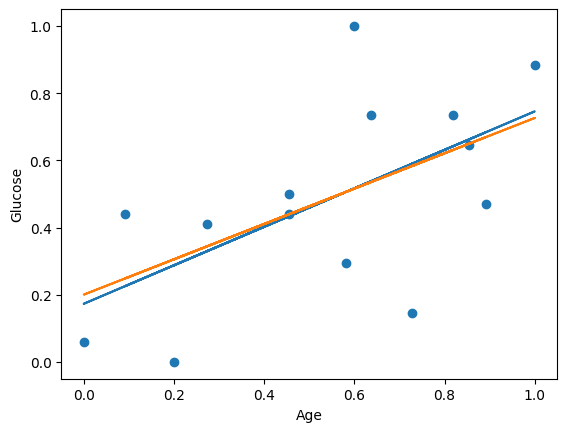

In [ ]:
# Step 3: Plot the two equations from Steps 1 and 2 as well as the raw data points on the same graph.
coeffsRand = np.array([random.random(), random.random()])
b0Arr, b1Arr, SSEArr = gradientDescent(coeffsRand, ageNorm, glucoseNorm, 0.1, 50)

coeffsGD = (b0Arr[-1], b1Arr[-1])
yHatGD = prediction(ageNorm, coeffsGD)
SSEGD = calcSSE(glucoseNorm, yHatGD)
print("gradient descent b0 coefficient:", round(coeffsGD[0], 4))
print("gradient descent b1 coefficient:", round(coeffsGD[1], 4))
print("gradient descent predicted values:", np.round(yHatGD, 4))
print("gradient descent error:", round(SSEGD, 4))

plt.scatter(ageNorm, glucoseNorm)
plt.plot(ageNorm, yHatLR)
plt.plot(ageNorm, yHatGD)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.show()

gradient descent number of iterations: 320
gradient descent b0 coefficient: 0.1738
gradient descent b1 coefficient: 0.5714
gradient descent predicted values: [0.5166 0.2881 0.3296 0.5062 0.6621 0.6828 0.4335 0.2258 0.6413 0.5893
 0.7452 0.1738 0.5374 0.4335]
gradient descent error: 0.0529


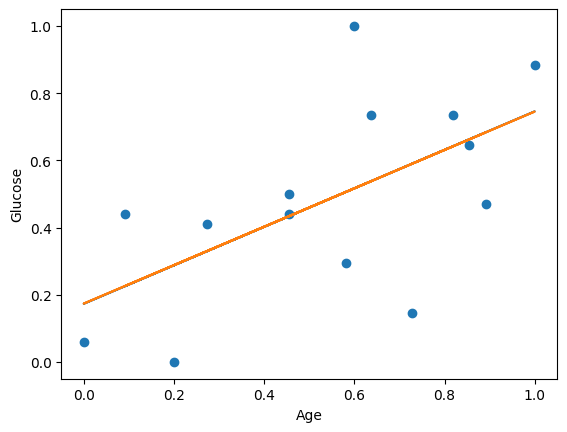

In [ ]:
# Step 4: Iterate a different amount of times to observe the impact on the cost function.
#         Note the minimum number of iterations it takes for the two lines to coincide.
numIterations = 320
b0ArrTest, b1ArrTest, SSEArrTest = gradientDescent(coeffsRand, ageNorm, glucoseNorm, 0.1, numIterations)

coeffsTestGD = (b0ArrTest[-1], b1ArrTest[-1])
yHatTestGD = prediction(ageNorm, coeffsTestGD)
SSEtestGD = calcSSE(glucoseNorm, yHatTestGD)
print("gradient descent number of iterations:", numIterations)
print("gradient descent b0 coefficient:", round(coeffsTestGD[0], 4))
print("gradient descent b1 coefficient:", round(coeffsTestGD[1], 4))
print("gradient descent predicted values:", np.round(yHatTestGD, 4))
print("gradient descent error:", round(SSEtestGD, 4))

plt.scatter(ageNorm, glucoseNorm)
plt.plot(ageNorm, yHatLR)
plt.plot(ageNorm, yHatTestGD)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.show()

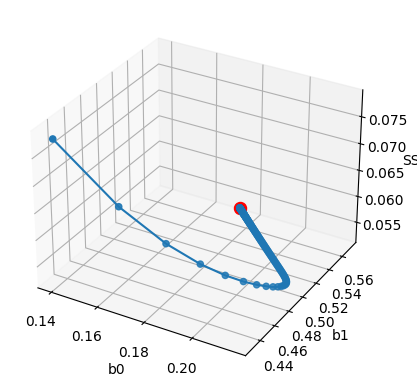

In [ ]:
# Step 5: Plot the coefficients (b0 and b1) on the x and y axes, respectively,
#         and the SSE (Sum of Square Errors) on the z-axis.

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs=b0ArrTest, ys=b1ArrTest, zs=SSEArrTest)
ax.plot(xs=b0ArrTest, ys=b1ArrTest, zs=SSEArrTest)
ax.set_xlabel("b0")
ax.set_ylabel("b1")
ax.set_zlabel("SSE")


# Highlight the last coefficents (should be the ones with the minimized cost)
ax.scatter(b0ArrTest[-1], b1ArrTest[-1], SSEArrTest[-1], color="red", s=75)
plt.show()

In [ ]:
# Step 6: Use the R-squared score metric to calculate the performance for both methods.
def score(y, y_hat):
  score = r2_score(y, y_hat)
  return score

rscoreLR = score(glucoseNorm, yHatLR)
rscoreGD = score(glucoseNorm, yHatGD)
print("simple linear regression r-square score:", round(rscoreLR, 4))
print("gradient descent r-square score:", round(rscoreGD, 4))

simple linear regression r-square score: 0.3573
gradient descent r-square score: 0.3549
